In [1]:
# Directory Tools:
import os
# Data Exploration Tools:
import pandas as pd
import numpy as np
# Data Visualization Tools:
import matplotlib.pyplot as plt
# NLP tools:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer # Lemmatization Tools
from nltk.collocations import * #Bigrams/Trigrams
from nltk.corpus import wordnet as wn # Word Disambiguating
from nltk.wsd import lesk # Word Disambiguating
import re # To split text
from nltk.corpus import stopwords # For stop words
from string import punctuation # Punction list of stop words
# Machine Learning
from sklearn.model_selection import cross_val_score

In [2]:
os.getcwd() # Check
os.chdir('C:/Users/jdavo/OneDrive/Documents/Datasets/Industrial Safety') # Use forward slashes
os.getcwd() # Validate

'C:\\Users\\jdavo\\OneDrive\\Documents\\Datasets\\Industrial Safety'

In [3]:
data = pd.read_csv('isahd.csv')
del data['Unnamed: 0']

In [5]:
# Data Exploration:
data.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [4]:
data.head()
data[data['Countries'] == 'Country_01']

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...
10,2016-01-28 00:00:00,Country_01,Local_03,Mining,I,III,Male,Employee,Others,While installing a segment of the polyurethane...
11,2016-01-30 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,While preparing the rice for the lunch of the ...
13,2016-02-02 00:00:00,Country_01,Local_01,Mining,IV,V,Male,Third Party,Electrical installation,"In moments that the operator of the Jumbo 2, t..."
16,2016-02-06 00:00:00,Country_01,Local_04,Mining,III,IV,Male,Third Party,Others,"At Rp 050 of level 1620, in circumstances wher..."


In [5]:
data.tail()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: object(10)
memory usage: 33.3+ KB


Changes columns with distinct levels (catcols) into categorical columns.

In [4]:
catcols = ['Countries', 'Potential Accident Level', 'Accident Level', 'Critical Risk', 'Industry Sector','Local', 'Genre', 'Employee or Third Party']
for cols in catcols:
    data[cols] = data[cols].astype('category')
data.Date = pd.to_datetime(data.Data, format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
Data                        425 non-null object
Countries                   425 non-null category
Local                       425 non-null category
Industry Sector             425 non-null category
Accident Level              425 non-null category
Potential Accident Level    425 non-null category
Genre                       425 non-null category
Employee or Third Party     425 non-null category
Critical Risk               425 non-null category
Description                 425 non-null object
dtypes: category(8), object(2)
memory usage: 12.8+ KB


C:\Users\jdavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Separate the description data by each word and count the number of times it appears (__TOKENIZATION__). The words were also put into a dictionary where the key is the word and the value is the count of that word per description. The words have also been lematized to their basic form to pair up similar words (__LEMMATIZATION__). Stop words from NLTK, Punctation and spaces have been taken out and a dataframe has been created out of the new dictionary.

In [5]:
# Preprocessing Set up:
stop_words = set(stopwords.words('english') + list(punctuation) + list(' '))
r = {}
k = {}
lemmatizer = WordNetLemmatizer()

zs = []
# Body: Tokenize/Lemmatize
for d in range(len(data)):
    bs = data['Description'][d].split(' ')
    count = 0
    z = []
    for b in bs:
        b = re.sub('[^a-zA-Z0-9]', '', b).lower().strip() # Take out special characters in words     
        lemb = lemmatizer.lemmatize(b) # Word Lemmatizing
        if lemb in stop_words:
            pass
        if lemb not in stop_words:
            z.append(lemb)
            if lemb in r.keys():
                r[lemb] += 1
            elif lemb not in r.keys():
                r[lemb] = 1     
        count += 1
    k[d] = r
    r = {}
    zs.extend(z)
    
# Output: Into Dataframe
word_set = pd.DataFrame(k).transpose()
data1 = pd.concat([data, word_set], axis=1, join='inner')

In [6]:
# Bigram List
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(zs)
ngram = list(finder.ngram_fd.items())
bigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Bigram',1:'Freq'})
bigram

,Bigram,Freq
150,"(left, hand)",70
576,"(right, hand)",57
1044,"(time, accident)",56
99,"(causing, injury)",55
282,"(employee, wa)",35
1401,"(finger, left)",25
1823,"(employee, report)",22
1218,"(wa, wearing)",20
200,"(injury, described)",20
2509,"(da, silva)",18


In [7]:
# Trigram List
trigram_measure = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(zs, 3)
ngram = list(finder.ngram_fd.items())
trigram = pd.DataFrame(ngram).sort_values(1, ascending=False).rename(columns={0:'Trigram',1:'Freq'})
trigram

,Trigram,Freq
1528,"(finger, left, hand)",24
202,"(causing, injury, described)",15
1257,"(finger, right, hand)",14
2991,"(injury, time, accident)",13
1265,"(wa, wearing, safety)",9
4055,"(time, accident, employee)",9
151,"(hand, causing, injury)",8
8682,"(manoel, da, silva)",8
3359,"(generating, described, injury)",8
4440,"(wa, allergic, reaction)",7


In [9]:
d = np.zeros(len(data1.loc[0, 'Description']), dtype='U30')
d[1] = 'Cat'
zs

['removing',
 'drill',
 'rod',
 'jumbo',
 '08',
 'maintenance',
 'supervisor',
 'proceeds',
 'loosen',
 'support',
 'intermediate',
 'centralizer',
 'facilitate',
 'removal',
 'seeing',
 'mechanic',
 'support',
 'one',
 'end',
 'drill',
 'equipment',
 'pull',
 'hand',
 'bar',
 'accelerate',
 'removal',
 'moment',
 'bar',
 'slide',
 'point',
 'support',
 'tightens',
 'finger',
 'mechanic',
 'drilling',
 'bar',
 'beam',
 'jumbo',
 'activation',
 'sodium',
 'sulphide',
 'pump',
 'piping',
 'wa',
 'uncoupled',
 'sulfide',
 'solution',
 'wa',
 'designed',
 'area',
 'reach',
 'maid',
 'immediately',
 'made',
 'use',
 'emergency',
 'shower',
 'wa',
 'directed',
 'ambulatory',
 'doctor',
 'later',
 'hospital',
 'note',
 'sulphide',
 'solution',
 '',
 '48',
 'gram',
 '',
 'liter',
 'substation',
 'milpo',
 'located',
 'level',
 '170',
 'collaborator',
 'wa',
 'excavation',
 'work',
 'pick',
 'hand',
 'tool',
 'hitting',
 'rock',
 'flat',
 'part',
 'beak',
 'bounce',
 'hitting',
 'steel',
 'tip'

In [10]:
uniCountry = data1.loc[:,'Countries'].unique()
uniLocal = data1.loc[:,'Local'].unique()
uniIndustry = data1.loc[:, 'Industry Sector'].unique()
uniAccident = data1.loc[:, 'Accident Level'].unique()
b
g = b.rename_axis('word')
#g = g.merge(b, right_index=True, left_index=True, how='outer')
#g.merge(b, right_index=True, left_index=True, how='outer')
#str(count)
g = g.join(b, how='outer', lsuffix='_l', rsuffix='_r')
g.join(b, how='outer')

AttributeError: 'str' object has no attribute 'rename_axis'

In [11]:
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer

izerdef industryTfidf(data=data1):
    count = 0
    for i in uniIndustry:
        #for j in uniAccident:
        count += 1
        matrix = vectorizer.fit_transform(data[(data['Industry Sector'] == i) & (data['Accident Level'] == 'I')]['Description'])
        idf = pd.DataFrame(vectorizer.idf_)
        a = pd.DataFrame(vectorizer.get_feature_names())
        b = pd.concat([a, idf], axis=1, ignore_index=True).set_index(0).sort_values(1, ascending=False)\
                  .rename(columns={1:i}).rename_axis('word')
        if count >= 2:
            g = g.join(b, how='outer')
        else:
            g = b  
    return g

SyntaxError: invalid syntax (<ipython-input-11-aa9cce7c0d97>, line 3)

In [8]:
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_words) #Initiating TfidfVectorizer
matrix = vectorizer.fit_transform(data1['Description'])
idf = pd.DataFrame(vectorizer.idf_)
a = vectorizer.get_feature_names()
c = pd.DataFrame(matrix.toarray()[0])
e = pd.DataFrame(matrix.toarray())
e.columns = a
data2 = pd.concat([data1, e], axis=1)

In [9]:
Total2 = data2.mean().sort_values(ascending=True)
Country = data2.groupby('Countries').mean()
Alevel = data2.groupby('Accident Level').mean()
Isector = data2.groupby('Industry Sector').mean()
Total2

chestnut       0.000243
sutured        0.000243
stems          0.000243
done           0.000243
stitches       0.000243
inefficacy     0.000243
composition    0.000243
effective      0.000243
faucet         0.000243
jack           0.000243
firmly         0.000243
600            0.000243
monkey         0.000243
entire         0.000243
success        0.000270
like           0.000270
cane           0.000270
239            0.000270
sul            0.000275
marimbondos    0.000275
also           0.000275
sunglasses     0.000275
medicine       0.000275
drove          0.000275
situations     0.000275
consulted      0.000275
moths          0.000275
lavras         0.000275
good           0.000275
assisting      0.000275
                 ...   
hopper         2.000000
tray           2.000000
cart           2.000000
foam           2.000000
danon          2.000000
fenced         2.000000
danillo        2.000000
440            2.000000
torch          2.000000
paint          2.000000
reducer        2

In [14]:
num = 100

t = np.zeros(num)
for _ in range(num):
    bs_index = np.random.choice(data2.index, size=len(data2))
    bs_data = data2.iloc[bs_index]
    C1 = bs_data.groupby('Countries').mean().loc['Country_01']
    C2 = bs_data.groupby('Countries').mean().loc['Country_02']
    C3 = bs_data.groupby('Countries').mean().loc['Country_03']
    C12 = np.nanmean(abs(C1 - C2))
    C13 = np.nanmean(abs(C1 - C3))
    C23 = np.nanmean(abs(C2 - C3))
    t[_] = np.mean([C12, C13, C23])

plt.hist(t, normed=True)
plt.show()

(array([  88.25833683,  154.45208946,  132.38750525,  264.7750105 ,
         441.29168417,  242.71042629,  397.16251575,  242.71042629,
         132.38750525,  110.32292104]),
 array([ 0.01344274,  0.01389596,  0.01434917,  0.01480239,  0.0152556 ,
         0.01570882,  0.01616203,  0.01661525,  0.01706846,  0.01752168,
         0.01797489]),
 <a list of 10 Patch objects>)

In [110]:
C12 = np.nanmean(abs(data2.groupby('Countries').mean().loc['Country_01'] - data2.groupby('Countries').mean().loc['Country_02']))
num = 1000
t12 = np.zeros(num); t13 = np.zeros(num); t23 = np.zeros(num)
for _ in range(num):
    bs_index = np.random.choice(data2.index, size=len(data2))
    bs_data = data2.iloc[bs_index]
    C1 = bs_data.groupby('Countries').mean().loc['Country_01']
    C2 = bs_data.groupby('Countries').mean().loc['Country_02']
    C3 = bs_data.groupby('Countries').mean().loc['Country_03']
    t12[_] = np.nanmean(abs(C1 - C2))
    t13[_] = np.nanmean(abs(C1 - C3))
    t23[_] = np.nanmean(abs(C2 - C3))

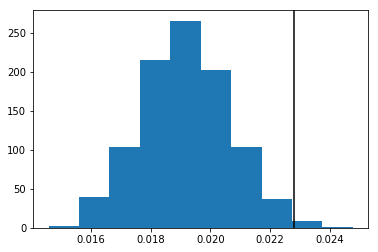

In [108]:
C12 = np.nanmean(abs(data2.groupby('Countries').mean().loc['Country_01'] - data2.groupby('Countries').mean().loc['Country_02']))
plt.hist(t, normed=True)
plt.axvline(C12, color='black')
plt.show()

In [206]:
def diffIndy_bs(num):
    t = np.zeros(num)
    for _ in range(num):
        bs_index = np.random.choice(data1.index, size=len(data1))
        bs_data = industryTfidf(data=data1.iloc[bs_index,:])
        MM = np.nanmean(bs_data.loc[:, 'Metals'] - bs_data.loc[:, 'Mining'])
        MO = np.nanmean(bs_data.loc[:, 'Metals'] - bs_data.loc[:, 'Others'])
        OM = np.nanmean(bs_data.loc[:, 'Others'] - bs_data.loc[:, 'Mining'])
        t[_] = np.mean([MM, MO, OM])
    return t
bb = diffIndy_bs(num)

KeyboardInterrupt: 

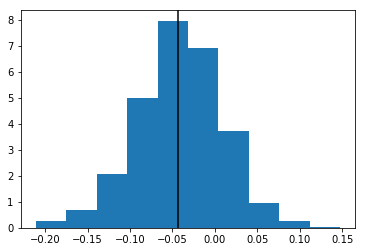

In [184]:
plt.hist(t, normed=True)
g = industryTfidf(data=data1)
MM = np.mean(g.loc[:, 'Metals'] - g.loc[:, 'Mining'])
MO = np.mean(g.loc[:, 'Metals'] - g.loc[:, 'Others'])
OM = np.mean(g.loc[:, 'Others'] - g.loc[:, 'Mining'])
ava = np.mean([MM, MO, OM])
plt.axvline(ava, color='black')
plt.show()

This takes the necessary deleted words out of the data columns

In [161]:
# Deleted Words
del data1[''] # Not needed
del data1['wa'] # Occurs often in all severity levels

Grouping data in different formats for the plots below
Later this will be done in the plotting cells instead of the one below.

In [ ]:
AL = data1.groupby('Accident Level').sum()
PAL = data1.groupby('Potential Accident Level').sum()

ALIS = data1.groupby(['Accident Level', 'Industry Sector']).sum()
PALIS = data1.groupby(['Potential Accident Level', 'Industry Sector']).sum()

ALC = data1.groupby(['Accident Level', 'Countries']).sum()

ALCL = data1.groupby(['Accident Level', 'Countries', 'Local']).sum()

#tot = ALIS.loc['I'].sum().rename('Total')

#.sort_values(by=tot, ascending=False, axis=1).iloc[:, :10]


#ALIS.loc['V', :].sort_values(by=ALIS.sum().sort_values(ascending=False), axis=1, ascending=False).iloc[:,:10].transpose().plot(kind='bar', stacked=True)

ALIS

For the 10 most common words in the __"Others"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and in the "Others" industries.
May need to use plot animation to scroll through more words than just the top 10.

In [2]:
# Others
IS = 'Others'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    if IS in ALIC.loc[i].index.get_level_values(level=0).unique():
        #for k in ALIC.index.get_level_values(level=1).unique():
        #fig, ax = plt.subplots(1, 2, 2)
        tot = ALIC.loc[i, IS].sum().rename('Total')
        for j in ALIC.loc[i, IS].index:
            _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
            ALIC.loc[i, IS, j] = _
        ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                      .drop('Total').iloc[:, :10].transpose()\
                      .plot(kind='bar', stacked=True)
        plt.title('Accident Level {0}' .format(i))
        plt.show()

NameError: name 'data1' is not defined

For the 10 most common words in the __"Mining"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and the Mining industry.
May need to use plot animation to scroll through more words than just the top 10.

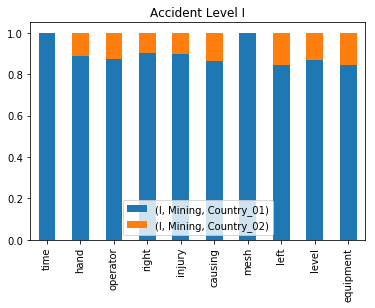

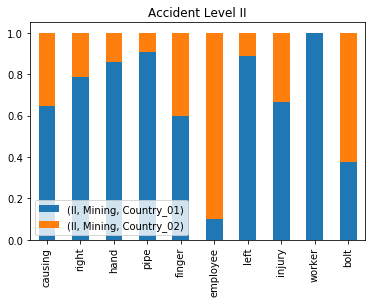

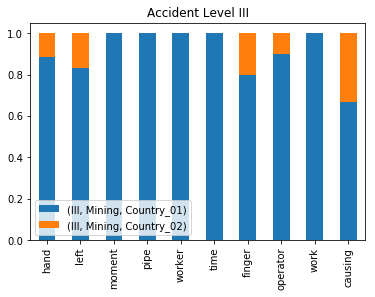

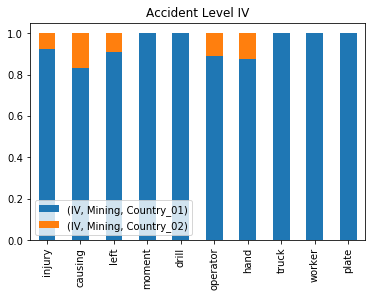

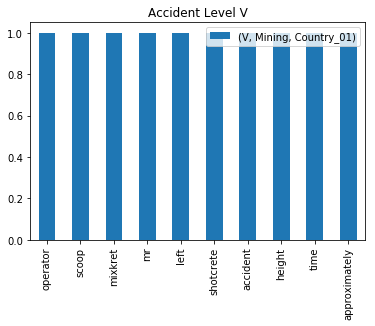

In [497]:
# Mining
IS = 'Mining'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    #for k in ALIC.index.get_level_values(level=1).unique():
    tot = ALIC.loc[i, IS].sum().rename('Total')
    for j in ALIC.loc[i, IS].index:
        _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
        ALIC.loc[i, IS, j] = _
    ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

For the 10 most common words in the __"Metals"__ industry what is the distribution by country.
The purpose of this plot is to show if there's a difference between the countries and the Metals industry.
May need to use plot animation to scroll through more words than just the top 10.

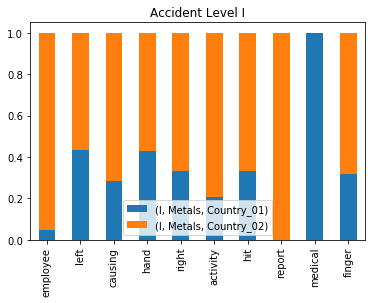

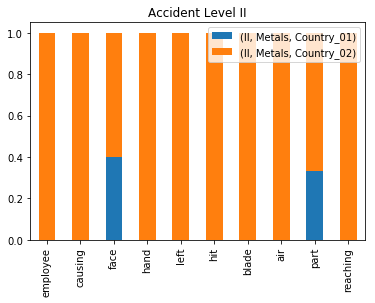

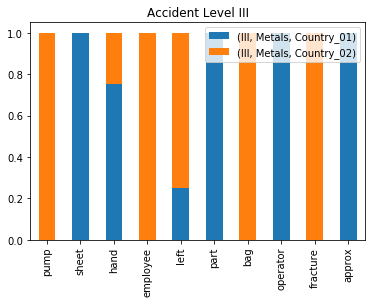

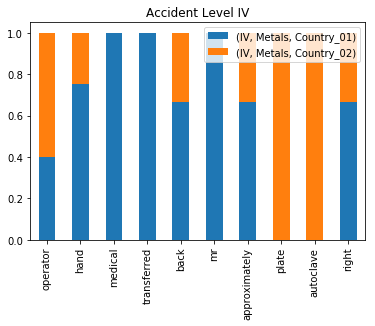

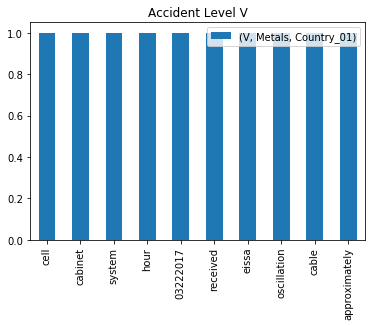

In [493]:
# Metals
IS = 'Metals'
ALIC = data1.groupby(['Accident Level', 'Industry Sector', 'Countries']).sum()
for i in ALIC.index.get_level_values(level=0).unique():
    #for k in ALIC.index.get_level_values(level=1).unique():
    #fig, ax = plt.subplots(1, 2, 2)
    tot = ALIC.loc[i, IS].sum().rename('Total')
    for j in ALIC.loc[i, IS].index:
        _ = (ALIC.loc[i, IS, j]/tot).rename(j)    
        ALIC.loc[i, IS, j] = _
    ALIC.loc[i, IS, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

Plotting the values by Accident Level and Country to the distribution of the word count by location (10 most common). 
This plot is okay but it may be better to show the probability distribution between location instead.
May need to add scroll bar here too.

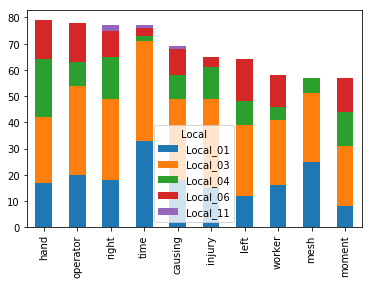

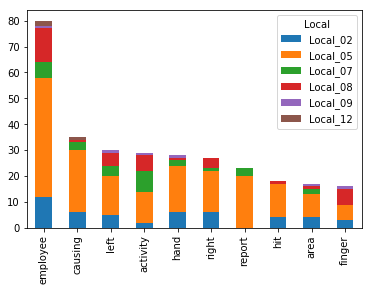

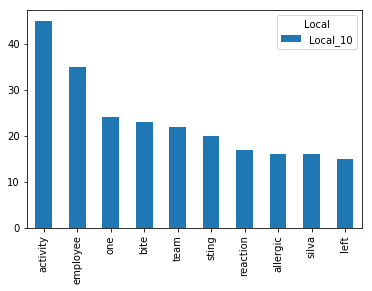

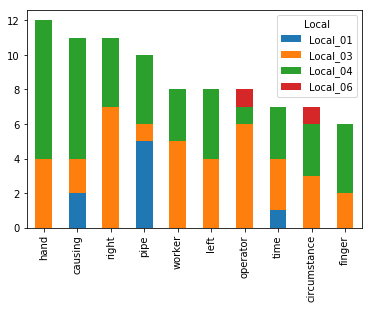

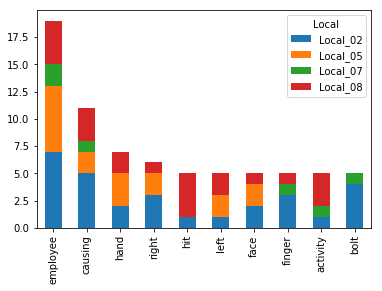

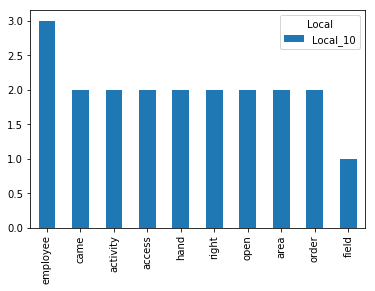

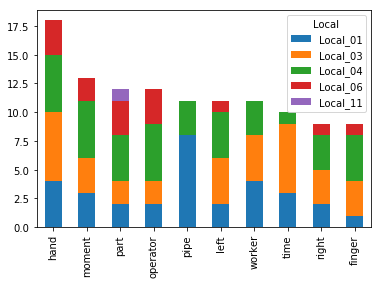

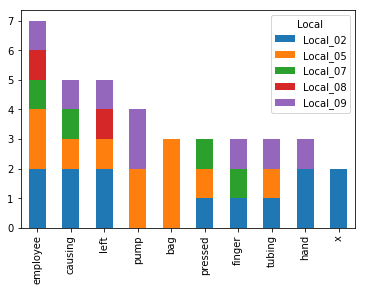

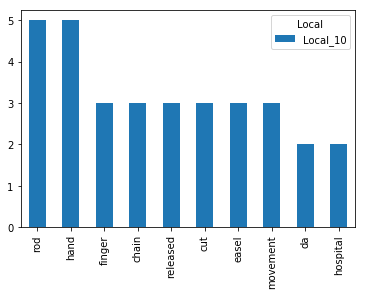

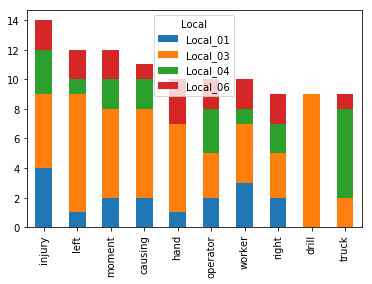

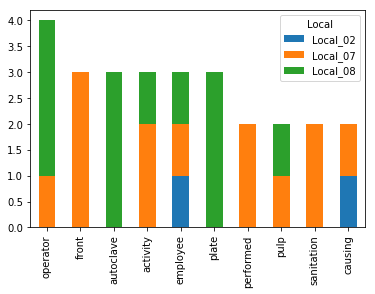

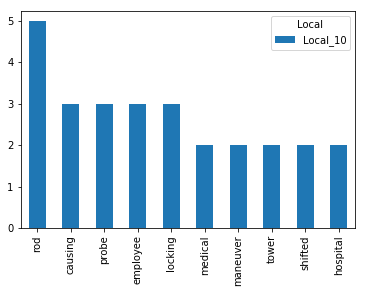

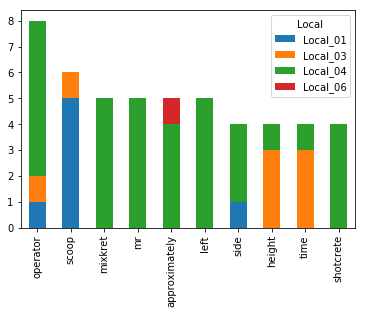

In [545]:
for i in ALCL.index.get_level_values(level=0).unique():
    for j in ALCL.loc[i].index.get_level_values(level=0).unique():
        #plt.subplot(1, 3, j+1)
        a = list(ALCL.loc[i].index.get_level_values(level=0).unique())
        tot = ALCL.loc[i, j].sum().rename('Total')
        ALCL.loc[i, j].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                      .drop('Total').iloc[:, :10].transpose()\
                      .plot(kind='bar', stacked=True)
        #plt.title('Accident Level {0}' .format(i))
        plt.show()

This shows the word frequency for each Accident Level based of each country (only showing the 10 most common words).
This let's us visually see if there's a difference between the Country and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.

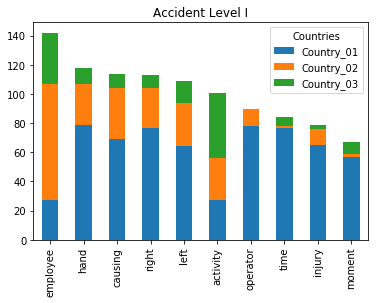

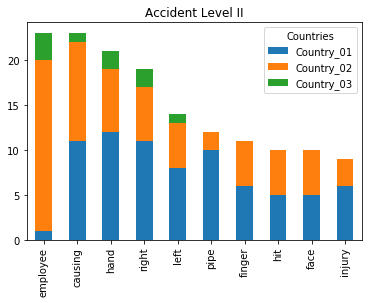

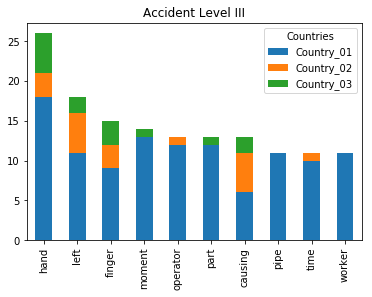

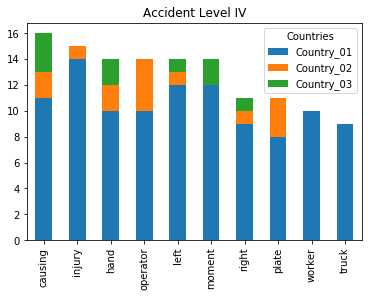

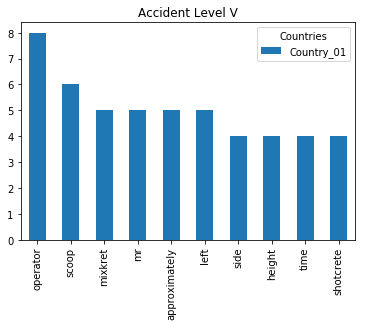

In [406]:
for i in ALC.index.get_level_values(level=0).unique():
    #plt.figure()
    tot = ALC.loc[i].sum().rename('Total')
    ALC.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

This shows the word frequency for each Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.

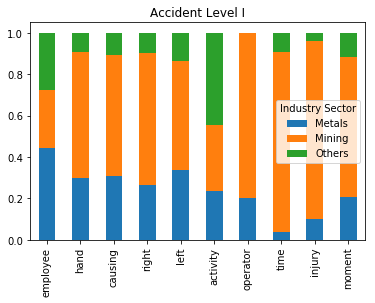

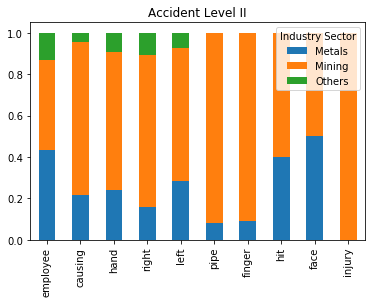

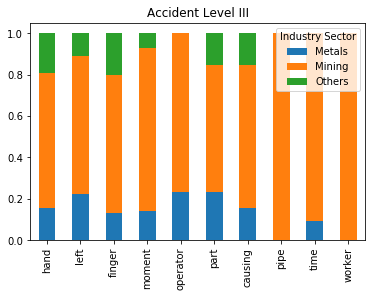

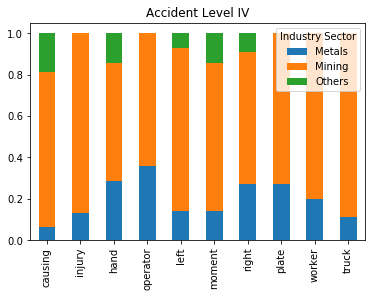

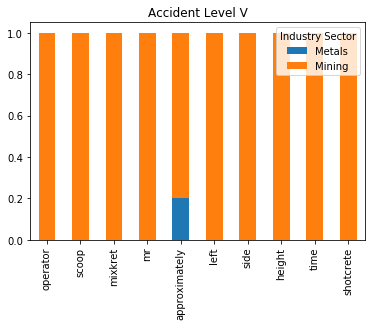

In [469]:
ALIS_T = data1.groupby(['Accident Level', 'Industry Sector']).sum()
for i in ALIS_T.index.get_level_values(level=0).unique():
    #fig, ax = plt.subplots(1, 2, 2)
    tot = ALIS_T.loc[i].sum().rename('Total')
    for j in ALIS_T.loc[i].index:
        _ = (ALIS_T.loc[i, j]/tot).rename(j)    
        ALIS_T.loc[i, j] = _
    ALIS_T.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                  .drop('Total').iloc[:, :10].transpose()\
                  .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

This shows the word count for each Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Accident Level.
May need to add some animation scroll to show more than just the top 10.
May need to change chart to a frequency bar graph to show distribution better.
Couldn't get these plots to go up next to the other Potential Accident Level plots.

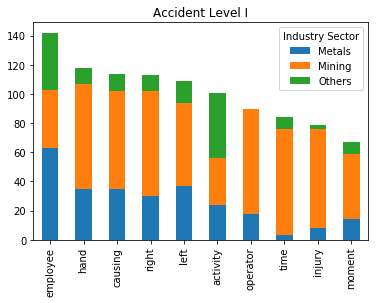

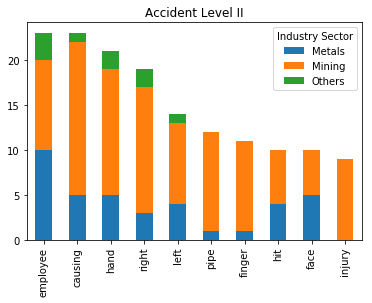

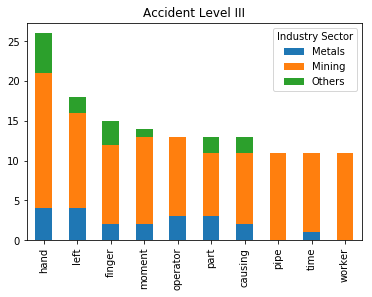

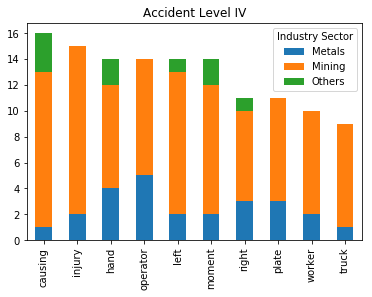

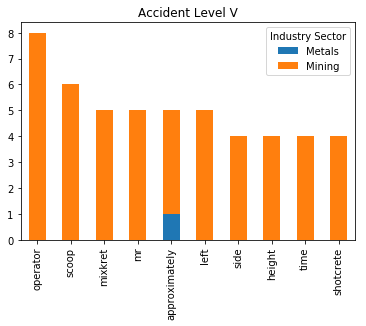

In [547]:
ALIS = data1.groupby(['Accident Level', 'Industry Sector']).sum()
for i in ALIS.index.get_level_values(level=0).unique():    
    tot = ALIS.loc[i].sum().rename('Total')
    ALIS.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                   .drop('Total').iloc[:, :10].transpose()\
                   .plot(kind='bar', stacked=True)
    plt.title('Accident Level {0}' .format(i))
    plt.show()

This shows the word count for each Potential Accident Level based of each industry (only showing the 10 most common words).
This let's us visually see if there's a difference between the Industry sectors and for each Potential Accident Level.
May need to add some animation scroll to show more than just the top 10.
May need to change chart to a frequency bar graph to show distribution better.
Couldn't get these plots to go up next to the other Accident level plots.

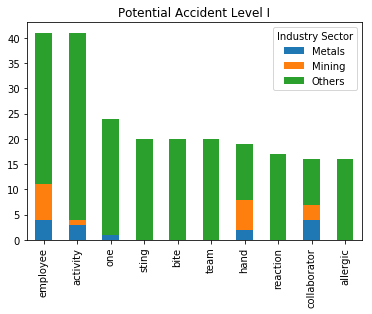

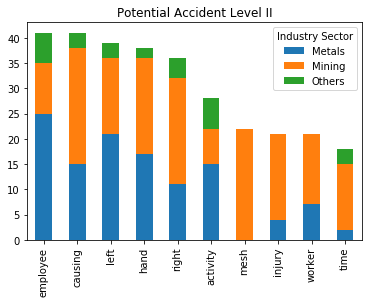

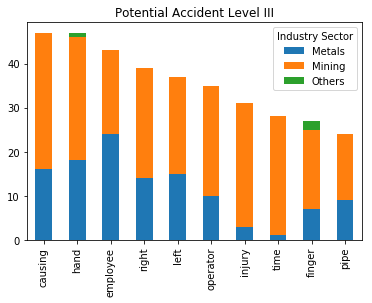

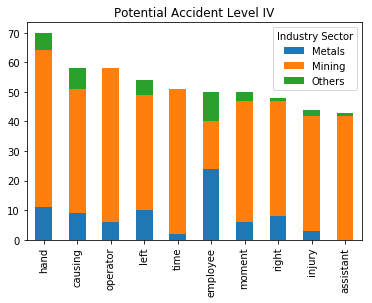

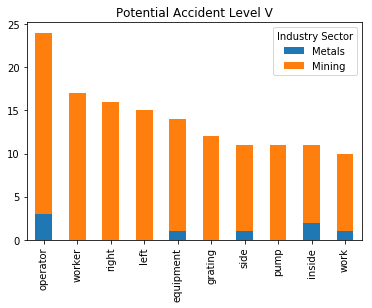

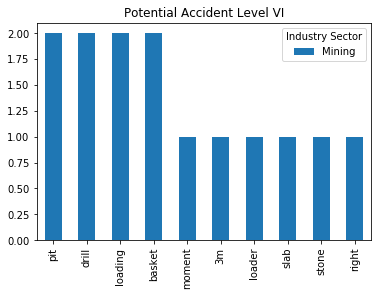

In [410]:
for i in PALIS.index.get_level_values(level=0).unique():    
    tot = PALIS.loc[i].sum().rename('Total')
    PALIS.loc[i, :].append(tot).sort_values(by='Total', axis=1, ascending=False)\
                   .drop('Total').iloc[:, :10].transpose()\
                   .plot(kind='bar', stacked=True)
    plt.title('Potential Accident Level {0}' .format(i))
    plt.show()

This a bar chart showing the 15 most common words for Accident Level and Potential Accident Level

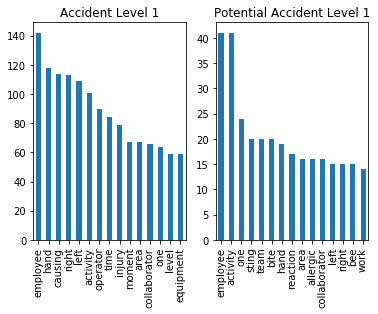

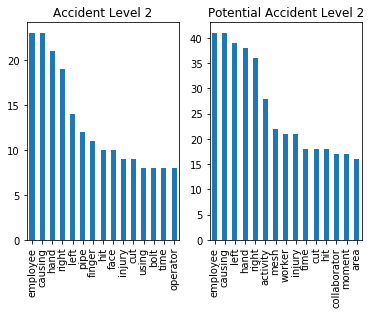

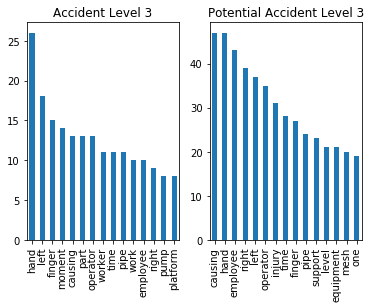

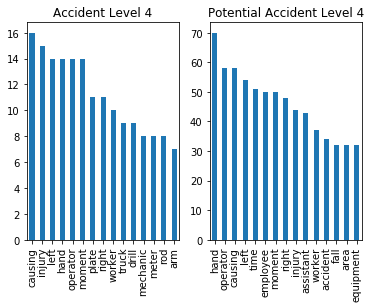

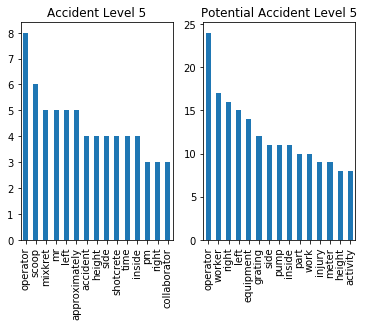

In [295]:
#fig, axes = plt.subplots(nrows=5, ncols=2)
for i in range(len(AL.index)):
    #plt.figure(i-1)
    plt.subplot(1, 2, 1)
    AL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.title('Accident Level {0}' .format(i+1))
    plt.subplot(1, 2, 2)
    PAL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.title('Potential Accident Level {0}' .format(i+1))
    plt.show()

This is a word cloud for each Accident Level and each Potential Accident Level. 
Plots show what the most common words by the size. 
Comparisons can be made between the Accident Level and the Potential Plot levels.

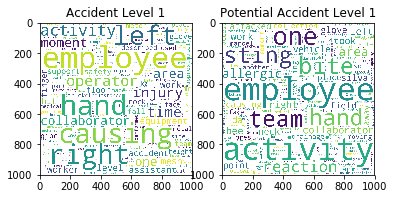

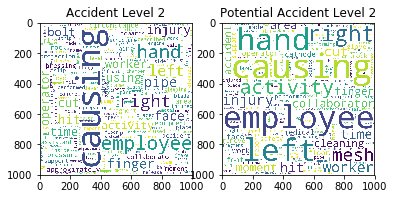

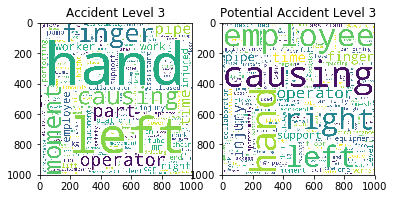

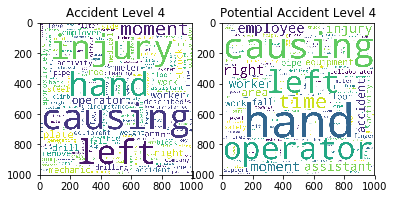

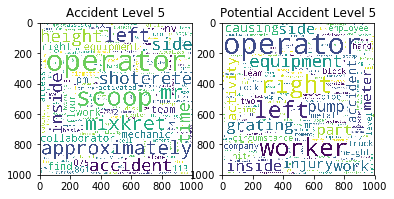

In [546]:
from wordcloud import WordCloud
for i in range(len(AL)):
    # Accident
    plt.subplot(1, 2, 1)
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color ='white').generate_from_frequencies(AL.iloc[i,:].dropna())
    plt.title('Accident Level {0}'.format(i+1))
    plt.imshow(wordcloud)
    # Potential Accident
    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color ='white').generate_from_frequencies(PAL.iloc[i,:].dropna())
    plt.title('Potential Accident Level {0}'.format(i+1))
    plt.imshow(wordcloud)
    plt.show()

In [110]:
 X = data2.drop(['Description', 'Accident Level', 'Data', 'Potential Accident Level'], axis=1)

In [25]:
X['Countries'].cat.codes
X

,Countries,Local,Industry Sector,Genre,Employee or Third Party,Critical Risk,,001,0010,007,...,yolk,young,z014,zaf,zamac,zero,zinc,zinco,zn,zone
0,Country_01,Local_01,Mining,Male,Third Party,Pressed,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,Country_02,Local_02,Mining,Male,Employee,Pressurized Systems,2.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Country_01,Local_03,Mining,Male,Third Party (Remote),Manual Tools,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,Country_01,Local_04,Mining,Male,Third Party,Others,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,Country_01,Local_04,Mining,Male,Third Party,Others,2.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.179065,0.0,0.0,0.000000,0.0,0.0,0.0
5,Country_02,Local_05,Metals,Male,Third Party (Remote),Pressurized Systems,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6,Country_02,Local_05,Metals,Male,Employee,Fall prevention (same level),NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
7,Country_01,Local_04,Mining,Male,Third Party,Pressed,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
8,Country_02,Local_02,Mining,Male,Third Party (Remote),Others,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
9,Country_01,Local_06,Metals,Male,Third Party,Chemical substances,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
Xcatcols = X.select_dtypes(include=['category']).columns
for cols in Xcatcols:
    X[cols] = X[cols].cat.codes
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(value=0)
y = data1['Accident Level']

In [ ]:
from imblearn.under_sampling import  RandomUnderSampler # Random Undersampling
from imblearn.under_sampling import ClusterCentroids # Cluster Undersampling
from imblearn.under_sampling import NearMiss # Nearmiss Undersampled
from imblearn.over_sampling import RandomOverSampler # Random Oversampling
from imblearn.over_sampling import SMOTE # SMOTE Oversampling
from imblearn.combine import SMOTEENN # SMOTEENN Combination
from imblearn.combine import SMOTETomek # SMOTETomek Combination
# Undersampling
## Random
rus = RandomUnderSampler(return_indices=True)
X_usampled, y_usampled, idx_usampled = rus.fit_sample(X, y)
## Cluster
cc = ClusterCentroids(random_state=42)
X_ccsampled, y_ccsampled = cc.fit_sample(X, y)
## Nearmiss
nm = NearMiss(random_state=42)
X_nmsampled, y_nmsampled = nm.fit_sample(X, y)


# Oversampling
## Random
ros = RandomUnderSampler(return_indices=True)
X_osampled, y_osampled, idx_osampled = rus.fit_sample(X, y)
## Smote
sm = SMOTE(random_state=42)
X_smsampled, y_smsampled = sm.fit_sample(X, y)


# Combine
## SMOTEENN
sme = SMOTEENN(random_state=42)
X_smesampled, y_smesampled = sme.fit_sample(X, y)
## SMOTETomek
smt = SMOTETomek(random_state=42)
X_smtsampled, y_smtsampled = smt.fit_sample(X, y)


Machine learning based on the description using a Bays Theorem Algorithm

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_smsampled, #np.array(X)
                                                    y_smsampled,
                                                    test_size=0.33,
                                                    random_state=53)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

In [13]:
# Imbalanced Learn
from imblearn.pipeline import make_pipeline as make_pipeline_imb

from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import make_pipeline

In [68]:
# MAY NOTE NEED
?RandomForestClassifier
SMOTE(random_state=4, k_neighbors=2)
#count_train = vectorizer.fit_transform(X_train.values)
#count_test = vectorizer.transform(X_test.values)

SMOTE(k=None, k_neighbors=2, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=4, ratio='auto', svm_estimator=None)

In [173]:
# Naive Bayes Multinomial
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)
metrics.accuracy_score(y_test, pred)
scores = cross_val_score(nb_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_of = nb_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_of))
print(metrics.accuracy_score(y_test, pred))
print(metrics.classification_report(y_test, pred))

0.8675159235668791
0.9792060491493384
0.9080459770114943
             precision    recall  f1-score   support

          I       0.98      0.62      0.76       105
         II       0.76      0.99      0.86        92
        III       0.90      1.00      0.95        94
         IV       0.92      0.94      0.93       112
          V       1.00      1.00      1.00       119

avg / total       0.92      0.91      0.90       522



In [174]:
# KNeighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
pred_means = classifier.predict(X_test)
metrics.accuracy_score(y_test, pred_means)
scores = cross_val_score(classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_means_of = classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_means_of))
print(metrics.accuracy_score(y_test, pred_means))
print(metrics.classification_report(y_test, pred_means))

0.5515846994535518
0.8402646502835539
0.8218390804597702
             precision    recall  f1-score   support

          I       1.00      0.18      0.31       105
         II       0.59      1.00      0.74        92
        III       0.88      1.00      0.94        94
         IV       0.88      0.94      0.91       112
          V       0.99      1.00      1.00       119

avg / total       0.88      0.82      0.78       522



In [175]:
# SVM
from sklearn import svm
clf = svm.SVC(degree=6)
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)
clf.score(X_test, y_test)
scores = cross_val_score(clf, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_svm_of = clf.predict(X_train)
print(metrics.accuracy_score(y_train, pred_svm_of))
print(metrics.accuracy_score(y_test, pred_svm))
print(classification_report_imbalanced(y_test, pred_svm))

0.23624203821656053
0.4017013232514178
0.3793103448275862
                   pre       rec       spe        f1       geo       iba       sup

          I       0.00      0.00      1.00      0.00      0.00      0.00       105
         II       0.34      0.43      0.82      0.38      0.60      0.34        92
        III       0.27      0.93      0.44      0.41      0.64      0.43        94
         IV       0.00      0.00      1.00      0.00      0.00      0.00       112
          V       0.92      0.60      0.99      0.72      0.77      0.56       119

avg / total       0.32      0.38      0.86      0.31      0.39      0.27       522



C:\Users\jdavo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [168]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
pred_dt = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, pred_dt)
scores = cross_val_score(dt_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_dt_of = dt_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_dt_of))
print(metrics.accuracy_score(y_test, pred_dt))
print(metrics.classification_report(y_test, pred_dt))

0.7680254777070062
1.0
0.8620689655172413
             precision    recall  f1-score   support

          I       0.77      0.69      0.72       105
         II       0.88      0.84      0.86        92
        III       0.84      0.86      0.85        94
         IV       0.86      0.90      0.88       112
          V       0.95      1.00      0.98       119

avg / total       0.86      0.86      0.86       522



In [177]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(max_depth=8)
rf_classifier.fit(X_train, y_train)
pred_rf = rf_classifier.predict(X_test)
metrics.accuracy_score(y_test, pred_rf)
scores = cross_val_score(rf_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_rf_of = dt_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_rf_of))
print(metrics.accuracy_score(y_test, pred_rf))
print(metrics.classification_report(y_test, pred_rf))

0.8105668789808917
1.0
0.8735632183908046
             precision    recall  f1-score   support

          I       0.69      0.79      0.73       105
         II       0.84      0.95      0.89        92
        III       0.95      0.87      0.91        94
         IV       0.91      0.77      0.83       112
          V       1.00      0.99      1.00       119

avg / total       0.88      0.87      0.88       522



In [188]:
# Bagging Classifier
## Import
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
## Classifier
base_estimator = DecisionTreeClassifier(); n_estimators = 10
bag_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
bag_classifier.fit(X_train, y_train)
## Predict
pred_bag = bag_classifier.predict(X_test)
pred_bag_of = bag_classifier.predict(X_train)
## Scores
scores = cross_val_score(bag_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_bag_of = bag_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_bag_of))
print(metrics.accuracy_score(y_test, pred_bag))
print(metrics.classification_report(y_test, pred_bag))

0.8388535031847134
0.998109640831758
0.9425287356321839
             precision    recall  f1-score   support

          I       0.88      0.89      0.88       105
         II       0.94      0.98      0.96        92
        III       0.93      0.90      0.92        94
         IV       0.97      0.95      0.96       112
          V       0.98      0.99      0.99       119

avg / total       0.94      0.94      0.94       522



In [ ]:
# Voting Classifier
## Import
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
## Classifier
base_estimator = DecisionTreeClassifier(); n_estimators = 100
bag_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=42)
bag_classifier.fit(X_train, y_train)
## Predict
pred_bag = bag_classifier.predict(X_test)
pred_bag_of = bag_classifer.predict(X_train)
## Scores
scores = cross_val_score(bag_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_bag_of = bag_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_bag_of))
print(metrics.accuracy_score(y_test, pred_bag))
print(metrics.classification_report(y_test, pred_bag))

In [187]:
# Adaptive Boosting Classifier
## Import
from sklearn.ensemble import AdaBoostClassifier
## Classifier
#n_estimators = 100
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train, y_train)
## Predict
pred_ada = ada_classifier.predict(X_test)
pred_ada_of = ada_classifier.predict(X_train)
## Scores
scores = cross_val_score(ada_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_bag_of = bag_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_ada_of))
print(metrics.accuracy_score(y_test, pred_ada))
print(metrics.classification_report(y_test, pred_ada))

0.4592356687898089
0.4281663516068053
0.4425287356321839
             precision    recall  f1-score   support

          I       0.75      0.03      0.06       105
         II       0.64      0.08      0.14        92
        III       0.25      0.97      0.39        94
         IV       0.62      0.12      0.20       112
          V       0.99      0.98      0.99       119

avg / total       0.67      0.44      0.37       522



In [191]:
# Gradient Tree Boosting Classifier
## Import
from sklearn.ensemble import GradientBoostingClassifier
## Classifier
n_estimators = 100
gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
gb_classifier.fit(X_train, y_train)
## Predict
pred_gb = gb_classifier.predict(X_test)
pred_gb_of = gb_classifier.predict(X_train)
## Scores
scores = cross_val_score(gb_classifier, X_test, y_test, cv=cv, n_jobs=-1)
print(scores.mean())
pred_gb_of = gb_classifier.predict(X_train)
print(metrics.accuracy_score(y_train, pred_gb_of))
print(metrics.accuracy_score(y_test, pred_gb))
print(metrics.classification_report(y_test, pred_gb))

0.9222929936305733
1.0
0.9482758620689655
             precision    recall  f1-score   support

          I       0.84      0.92      0.88       105
         II       0.94      0.96      0.95        92
        III       0.99      0.93      0.96        94
         IV       0.99      0.93      0.96       112
          V       1.00      1.00      1.00       119

avg / total       0.95      0.95      0.95       522



In [229]:
# XG Boost Classifier
## Import
import xgboost as xgb
## Setup
yd_train = data2.Description.astype('category').cat.codes
dtrain = xgb.DMatrix(np.array(X_train), label=np.array(y_train))
dtest = xgb.DMatrix(np.array(X_test), label=np.array(y_test))
## Classifier
num_round = 10
param = {'max_depth': 2, 'eta': 1, 'silent': 1}
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
#evallist = [(dtest, 'eval'), (dtrain, 'train')]
#bst = xgb.train(param, dtrain, num_round)
## Predict
pred_xgb = xgb_classifier.predict(X_test)
pred_xgb_of = xgb_classifier.predict(X_train)
## Scores
#kfold = KFold(n_splits=10, random_state=7)
scores = cross_val_score(model, X_test, y_test, cv=cv, n_jobs=-1)
#scores = cross_val_score(bst, dtest, dtest, cv=cv, n_jobs=-1)
print(scores.mean())
print(metrics.accuracy_score(y_train, pred_xgb_of))
print(metrics.accuracy_score(y_test, pred_xgb))
print(metrics.classification_report(y_test, pred_xgb))

C:\Users\jdavo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\jdavo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8968152866242038
0.994328922495274
0.9425287356321839
             precision    recall  f1-score   support

          0       0.83      0.95      0.89       105
          1       0.90      0.95      0.92        92
          2       1.00      0.89      0.94        94
          3       1.00      0.92      0.96       112
          4       1.00      0.99      1.00       119

avg / total       0.95      0.94      0.94       522



In [319]:
from sklearn.decomposition import PCA
pca_classifier = PCA(n_components=2)
pca_classifier.fit(X_train)
X_train_pca = pca_classifier.transform(X_train)
X_test_pca = pca_classifier.transform(X_test)

array(['I', 'III', 'V', ..., 'III', 'III', 'V'], dtype=object)

In [460]:
# This is just for testing ideas
#pd.DataFrame(ALIS.loc['I', 'Metals']/tot.rename('J')).plot(kind='bar')
test = ALIS
_ = (test.loc['I', 'Metals']/tot).rename(j)
for j in test.loc['I'].index:
    _ = (test.loc['I', j]/tot).rename(j)    
    test.loc['I', j] = _
print(ALIS.loc['I', 'Metals'].dropna())

01            0.333333
0130          1.000000
02bp0166      1.000000
02bp0167      1.000000
03            0.333333
04            0.333333
0400          1.000000
0430          1.000000
051917        1.000000
069           1.000000
07            0.500000
07182016      1.000000
08fi0502      1.000000
09            0.500000
1             0.222222
1000          0.333333
1122          1.000000
12            0.166667
13            0.500000
1340          1.000000
14            1.000000
1416          1.000000
1425          1.000000
1440          1.000000
15            0.055556
16            0.500000
160m          1.000000
17            1.000000
1840          0.500000
1st           0.666667
                ...   
water         0.200000
wear          1.000000
wearing       0.047619
weevil        1.000000
weight        0.058824
weld          1.000000
welder        0.083333
well          0.200000
went          0.428571
wheel         0.250000
willing       1.000000
window        0.500000
withdrawal 

In [89]:
# MAY NOTE NEED
# our classifier to use
from imblearn.datasets import fetch_datasets
from collections import Counter

classifier = RandomForestClassifier(random_state=42)
#classifier = MultinomialNB()
#classifer = DecisionTreeClassifier()
#data = fetch_datasets()['wine_quality']

# splitting data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=2)





# build normal model
pipeline = make_pipeline(classifier)
model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4, k_neighbors=1), classifier)
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(random_state=42), classifier)
nearmiss_model = nearmiss_pipeline.fit(X_train, y_train)
nearmiss_prediction = nearmiss_model.predict(X_test)

# print information about both models
print()
print("normal data distribution: {}".format(Counter(data['target'])))
X_smote, y_smote = SMOTE().fit_sample(data['data'], data['target'])
print("SMOTE data distribution: {}".format(Counter(y_smote)))
X_nearmiss, y_nearmiss = NearMiss().fit_sample(data['data'], data['target'])
print("NearMiss data distribution: {}".format(Counter(y_nearmiss)))

# classification report
print(classification_report(y_test, prediction))
print(classification_report_imbalanced(y_test, smote_prediction))

print()
print('normal Pipeline Score {}'.format(pipeline.score(X_test, y_test)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))
print('NearMiss Pipeline Score {}'.format(nearmiss_pipeline.score(X_test, y_test)))


print()
print("normal classification", y_test, prediction)
print()
print("SMOTE classification", y_test, smote_prediction)
print()
print("NearMiss classification", y_test, nearmiss_prediction)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

In [83]:
# MAY NOT NEED
classifier = RandomForestClassifier

# build normal model
pipline = make_pipeline(classifier(random_state=42))
model = pipline.fit(X_train, y_train)
prediction = model.predict(X_test)

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4, k_neighbors=2), classifier(random_state=42))
smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# build model with undersampleing
nearmiss_pipeline = make_pipeline_imb(NearMiss(random_state=42), classifier(random_state=42))
nearmiss_model = nearmiss_pipeline.fit(X_train, y_train)
nearmiss_prediction = nearmiss_model.predict(X_test)
